# Final Project

In [1]:
import sys
sys.path.append("C:/Users/sumit/OneDrive/Escritorio/Universidad/aprendizaje-automatico-IBM/venv/Lib/site-packages")

In [165]:
import warnings
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
%matplotlib inline

Required

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review.Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company. **✓**

**Sections required in your report:**

- Brief description of the data set and a summary of its attributes: **✓**

- Actions taken for data cleaning: **✓**

- Initial plan for data exploration

- Actions taken for feature engineering

- Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

- Formulating at least 3 hypothesis about this data

- Conducting a formal significance test for one of the hypotheses and discuss the results 

- Suggestions for next steps in analyzing this data

- A paragraph that summarizes the quality of this data set and a request for additional data if needed

## Brief description of the data set and a summary of its attributes

**Dataset name:**

Key Indicators of Heart Disease

2020 annual CDC survey data of 400k adults related to their health status

**Description:**

According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

**Summary of attributes:**

The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals). In machine learning projects, "HeartDisease" can be used as the explonatory variable, but note that the classes are heavily unbalanced.

- **HeartDisease:** Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- **BMI:** Body Mass Index
- **Smoking:** Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
- **AlcoholDrinking:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- **Stroke:** (Ever told) (you had) a stroke?
- **PhysicalHealth:** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
- **MentalHealth:** Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)
- **DiffWalking:** Do you have serious difficulty walking or climbing stairs?
- **Sex:** Are you male or female?
- **AgeCategory:** Fourteen-level age category
- **Race:** Imputed race/ethnicity value
- **Diabetic:** (Ever told) (you had) diabetes?
- **PhysicalActivity:** Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- **GenHealth:** Would you say that in general your health is...
- **SleepTime:** On average, how many hours of sleep do you get in a 24-hour period?
- **Asthma:** (Ever told) (you had) asthma?
- **KidneyDisease:** Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease? 
- **SkinCancer:** (Ever told) (you had) skin cancer? 

## Data Retrieving

First look to our data from a .csv file 

In [29]:
file_path = '../datasets/heart_2020_cleaned.csv'

heart_2020 = pd.read_csv(file_path)

heart_2020.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [30]:
# Number of data points:
print("Data points:", heart_2020.shape[0])
print("------------------------------------------------------------------------------------------------------------------")

# Column names:
print("Column names:", list(heart_2020.columns))
print("------------------------------------------------------------------------------------------------------------------")

# Data type of each column
print("Column types:")
print(heart_2020.dtypes)

Data points: 319795
------------------------------------------------------------------------------------------------------------------
Column names: ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']
------------------------------------------------------------------------------------------------------------------
Column types:
HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
Skin

## Actions taken for data cleaning

As a first step we look at the information in each of the columns of our data set

**As can be seen, there are no missing data in our data set. This is because the dataset is already clean since its download.**

In case we found null values there are three methods we can approach:
- Removing
- Imputing
- Masking

In [31]:
heart_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Data Exploration (EDA)

Next we visualize, how many samples of the dataset have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).

As we can see, our dataset is quite unbalanced.

In [32]:
# Number of patients of each label value of the variable HeartDisease
print(heart_2020['HeartDisease'].value_counts())

# Same numbers but in percentage
print('Yes:',(heart_2020['HeartDisease'].value_counts()['Yes']/heart_2020.shape[0])*100, "%")
print('No:',(heart_2020['HeartDisease'].value_counts()['No']/heart_2020.shape[0])*100, "%")

No     292422
Yes     27373
Name: HeartDisease, dtype: int64
Yes: 8.559545959130068 %
No: 91.44045404086994 %


We now show information for some categorical variables, in order to better understand our dataset.

In [33]:
# Number of patients by sex, AgeCategory and Race 
print(heart_2020['Sex'].value_counts())
print("-----------------------------------------------------------------------------------------------------")
print(heart_2020['AgeCategory'].value_counts())
print("-----------------------------------------------------------------------------------------------------")
print(heart_2020['Race'].value_counts())

Female    167805
Male      151990
Name: Sex, dtype: int64
-----------------------------------------------------------------------------------------------------
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64
-----------------------------------------------------------------------------------------------------
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64


As a next step, we visualize the basic statistical measures of our dataset

We can observe, the mean BMI of the sample is 28.32 which is above the normal range [18.5 - 24.9]. In addition, the mean daily sleep time is approximately 7 hours.

In [34]:
heart_initial_desc = heart_2020.describe()
heart_initial_desc

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


We change the 25% percentil name to median and calculate the range for our four numerical variables

In [35]:
heart_initial_desc.loc['range'] = heart_initial_desc.loc['max'] - heart_initial_desc.loc['min']
heart_initial_desc.rename({'50%': 'median'}, inplace=True)
heart_initial_desc

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
median,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000
range,82.830000,30.00000,30.000000,23.000000


Next we calculate, for each type of label in our target variable (HeartDisease) the mean and median values of the variables discussed above.

As expected, respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) have greater BMI, PhysicalHealth	and MentalHealth values

In [36]:
print("Mean:")
display(heart_2020.groupby(by='HeartDisease').mean())
print("Median:")
display(heart_2020.groupby(by='HeartDisease').median())

Mean:


,BMI,PhysicalHealth,MentalHealth,SleepTime
HeartDisease,,,,
No,28.224658,2.956416,3.828778,7.093416
Yes,29.401592,7.808242,4.641764,7.136156


Median:


,BMI,PhysicalHealth,MentalHealth,SleepTime
HeartDisease,,,,
No,27.26,0.0,0.0,7.0
Yes,28.34,0.0,0.0,7.0


We do the same analysis for the follwing categorical variables: Sex, AgeCategory and Race.

- With respect to BMI, we see that women and men have similar values, but it is the latter who seem to have better physical and mental health.
- With respect to the age category we see that individuals between 45-49 present the highest mean values with respect to the BMI variable. In addition, it is logical to think that people over 80 years of age present higher values in the physical health and sleep time variables and lower values for BMI, after the young people.

In [38]:
display(heart_2020.groupby(by='Sex').mean())
display(heart_2020.groupby(by='AgeCategory').mean())
display(heart_2020.groupby(by='Race').mean())

,BMI,PhysicalHealth,MentalHealth,SleepTime
Sex,,,,
Female,28.162436,3.681225,4.655916,7.118536
Male,28.505317,3.029989,3.061991,7.073380


,BMI,PhysicalHealth,MentalHealth,SleepTime
AgeCategory,,,,
18-24,25.762770,1.698965,6.152535,7.186432
25-29,27.688610,1.802241,5.729106,6.986435
30-34,28.440007,2.018344,5.292540,6.872660
35-39,28.838634,2.241606,5.049781,6.854939
40-44,29.199764,2.574836,4.675188,6.876940
45-49,29.487189,3.020834,4.385710,6.904043
50-54,29.425097,3.607596,4.321763,6.924159
55-59,29.098977,4.027422,4.055953,6.965487
60-64,28.821778,4.317728,3.550555,7.059105


,BMI,PhysicalHealth,MentalHealth,SleepTime
Race,,,,
American Indian/Alaskan Native,29.627678,4.791042,5.036332,7.056709
Asian,25.218303,1.630640,2.755454,6.918691
Black,30.169993,3.696935,4.211561,6.992763
Hispanic,28.818086,3.227137,4.188297,7.035014
Other,28.748967,4.052343,5.225750,6.860359
White,28.153422,3.354310,3.790924,7.131054


**Let's start now with basic data visualizations.**

We begin by showing the heart disease patients for each of the categorical variables in our data set.

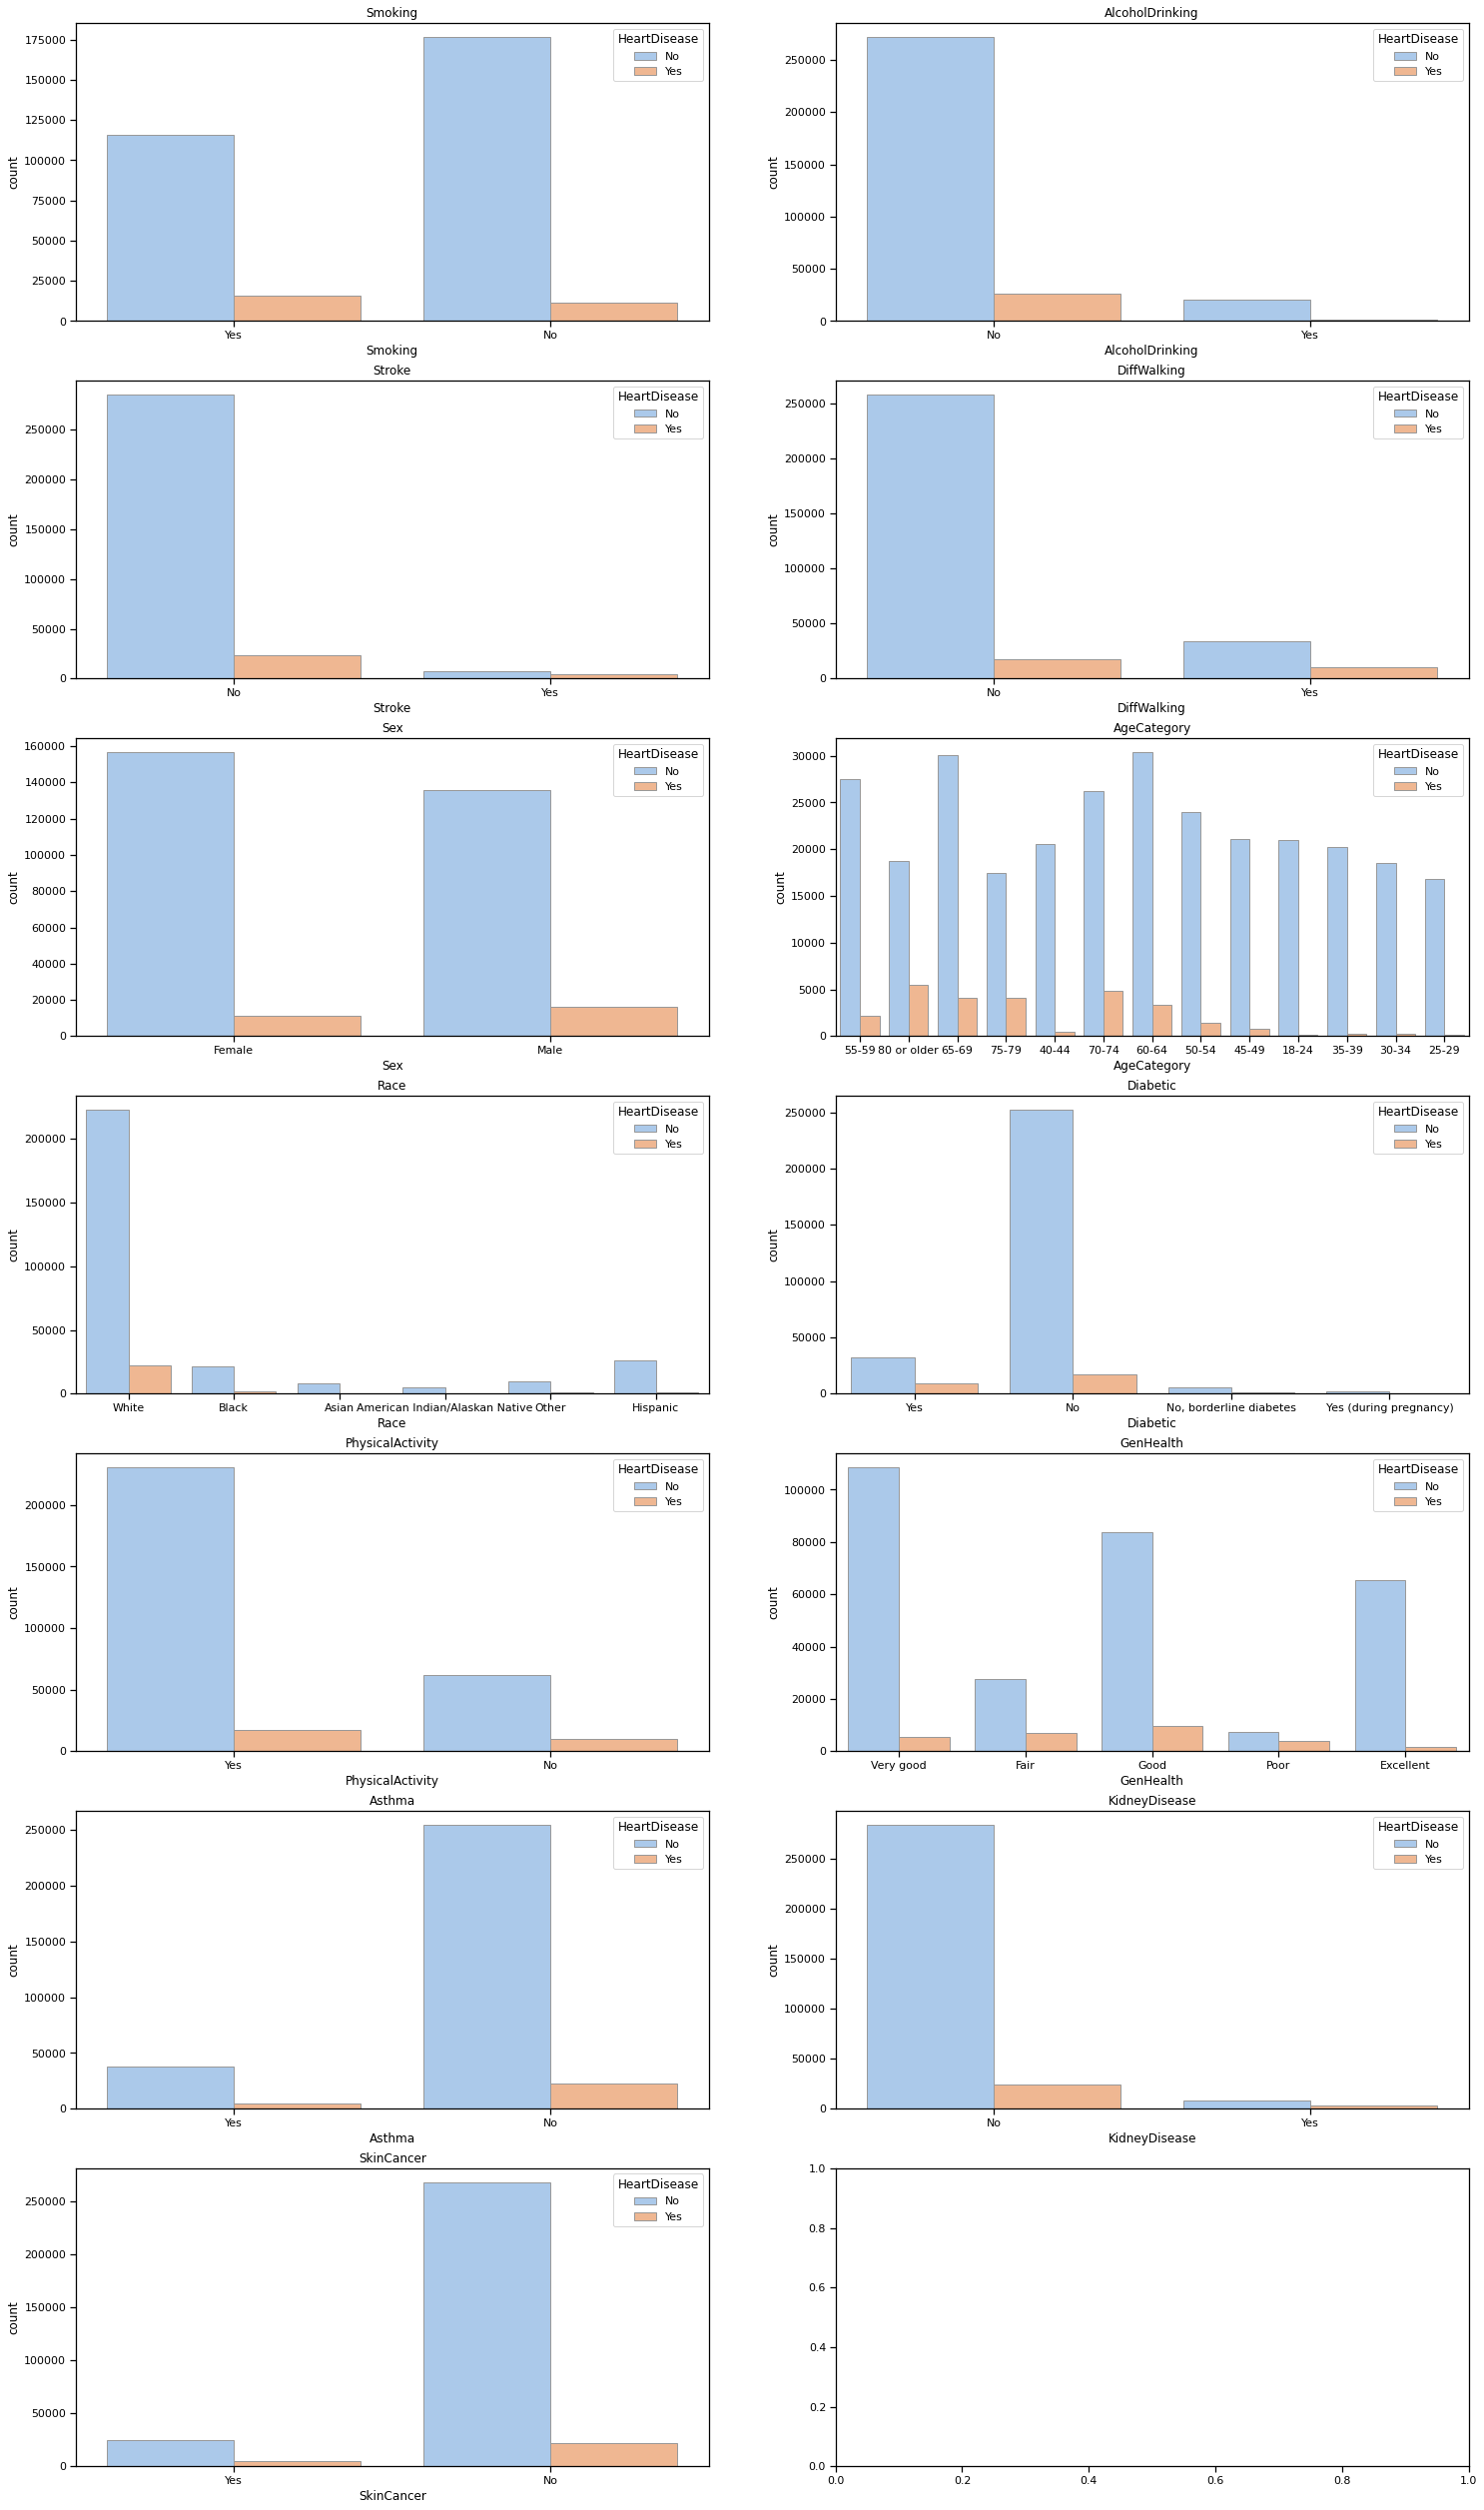

In [141]:
categorical_vars = [column for column in heart_2020.columns \
                    if heart_2020[column].dtype == 'object' and column != 'HeartDisease']
fig, axes = plt.subplots(7, 2, figsize=(25,45))

for categorical_var,ax in zip(categorical_vars, axes.ravel()):
    sns.countplot(x=categorical_var, hue="HeartDisease",
                palette="pastel", edgecolor=".6",
                data=heart_2020, ax=ax)
    ax.set_title(categorical_var)

We also show the histogram for each of the numerical variables in our data set.

C:\Users\sumit\AppData\Local\Temp/ipykernel_12708/424622297.py:11: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


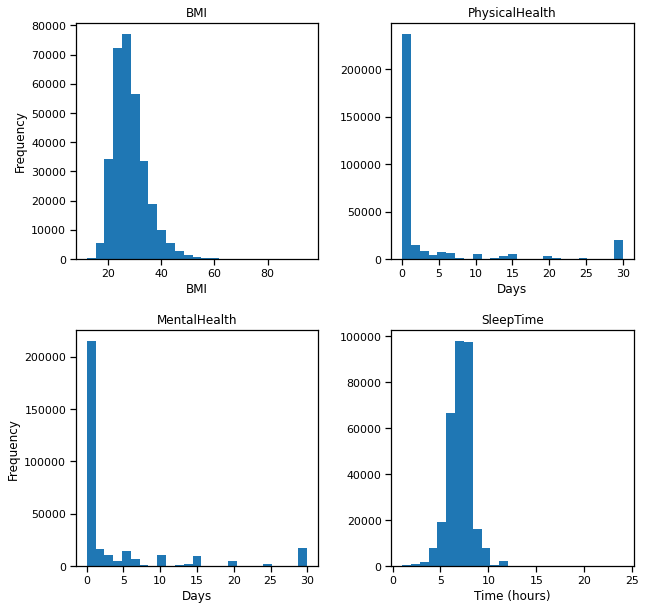

In [142]:
axList = heart_2020.hist(bins=25, figsize=(10,10), grid=False, )

for ax in axList.flatten():
    if 'Health' in ax.title.get_text():
        ax.set_xlabel('Days')
    elif 'Time' in ax.title.get_text():
        ax.set_xlabel('Time (hours)')
    else:
        ax.set_xlabel(ax.title.get_text())
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')